In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
import lightgbm
from sklearn.metrics import confusion_matrix, accuracy_score

In [6]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 39.1 MB/s eta 0:00:00:00:0100:01


In [7]:
from catboost import CatBoostClassifier

In [8]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='HAg-SuDdMK0wMe5_c7mB_bFK19vGj8km01mDeljg9eZe',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'pcos-donotdelete-pr-kjspbzdphjr4ie'
object_key = 'PCOS_infertility.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

inf = pd.read_csv(body)
inf.head(10)



,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26
5,6,10006,0,237.97,1.99,6.74
6,7,10007,0,1.99,1.99,3.05
7,8,10008,0,100.51,100.51,1.54
8,9,10009,0,1.99,1.99,1
9,10,10010,0,1.99,1.99,1.61


In [15]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='HAg-SuDdMK0wMe5_c7mB_bFK19vGj8km01mDeljg9eZe',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'pcos-donotdelete-pr-kjspbzdphjr4ie'
object_key = 'data without infertility _final.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

woinf = pd.read_csv(body)
woinf.head(10)



,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 42
0,1,10001,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,10002,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,10003,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,10004,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,10005,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
5,6,10006,0,36,74.1,165.0,27.217631,15,78,28,...,0.0,0,110,70,9,6,16.0,20.0,8.0,NaN
6,7,10007,0,34,64.0,156.0,26.298488,11,72,18,...,0.0,0,120,80,6,6,15.0,16.0,6.8,NaN
7,8,10008,0,33,58.5,159.0,23.139907,13,72,20,...,0.0,0,120,80,7,6,15.0,18.0,7.1,NaN
8,9,10009,0,32,40.0,158.0,16.023073,11,72,18,...,0.0,0,120,80,5,7,17.0,17.0,4.2,NaN
9,10,10010,0,36,52.0,150.0,23.111111,15,80,20,...,0.0,0,110,80,1,1,14.0,17.0,2.5,NaN


In [16]:
inf.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [17]:
woinf.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 42
0,1,10001,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,10002,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,10003,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,10004,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,10005,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [18]:
# Data Wrangling 
inf.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'],
      dtype='object')

In [19]:
woinf.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)', 'Unnamed: 42'],
      dtype='object')

In [25]:
pcos = pd.merge(woinf, inf, on='Patient File No.', suffixes=('', '_wo'), how='left')


In [26]:
pcos.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)', 'Unnamed: 42', 'Sl. No_wo', 'PCOS (Y/N)_wo',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)_wo'],
      dtype='object')

In [28]:
pcos = pcos.drop(['Unnamed: 42', 'Sl. No_wo', 'PCOS (Y/N)_wo', 
                  '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 
                  'AMH(ng/mL)_wo'], axis=1, errors='ignore')


In [29]:
pcos = pcos.rename(columns = {"PCOS (Y/N)":"Target"})

In [30]:
pcos = pcos.drop(["Sl. No","Patient File No."],axis = 1)

In [31]:
pcos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Target                 541 non-null    int64  
 1    Age (yrs)             541 non-null    int64  
 2   Weight (Kg)            541 non-null    float64
 3   Height(Cm)             541 non-null    float64
 4   BMI                    541 non-null    float64
 5   Blood Group            541 non-null    int64  
 6   Pulse rate(bpm)        541 non-null    int64  
 7   RR (breaths/min)       541 non-null    int64  
 8   Hb(g/dl)               541 non-null    float64
 9   Cycle(R/I)             541 non-null    int64  
 10  Cycle length(days)     541 non-null    int64  
 11  Marraige Status (Yrs)  540 non-null    float64
 12  Pregnant(Y/N)          541 non-null    int64  
 13  No. of aborptions      541 non-null    int64  
 14  FSH(mIU/mL)            541 non-null    float64
 15  LH(mIU

In [32]:
pcos["AMH(ng/mL)"].head()

0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: object

In [33]:
data = pcos

In [35]:
data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)

data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)

data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)

In [36]:
data.columns = [col.strip() for col in data.columns]

In [37]:
data.columns

Index(['Target', 'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI',
       'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of aborptions', 'FSH(mIU/mL)', 'LH(mIU/mL)',
       'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [38]:
data.isnull().sum()

Target                   0
Age (yrs)                0
Weight (Kg)              0
Height(Cm)               0
BMI                      0
Blood Group              0
Pulse rate(bpm)          0
RR (breaths/min)         0
Hb(g/dl)                 0
Cycle(R/I)               0
Cycle length(days)       0
Marraige Status (Yrs)    0
Pregnant(Y/N)            0
No. of aborptions        0
FSH(mIU/mL)              0
LH(mIU/mL)               0
FSH/LH                   0
Hip(inch)                0
Waist(inch)              0
Waist:Hip Ratio          0
TSH (mIU/L)              0
AMH(ng/mL)               0
PRL(ng/mL)               0
Vit D3 (ng/mL)           0
PRG(ng/mL)               0
RBS(mg/dl)               0
Weight gain(Y/N)         0
hair growth(Y/N)         0
Skin darkening (Y/N)     0
Hair loss(Y/N)           0
Pimples(Y/N)             0
Fast food (Y/N)          0
Reg.Exercise(Y/N)        0
BP _Systolic (mmHg)      0
BP _Diastolic (mmHg)     0
Follicle No. (L)         0
Follicle No. (R)         0
A

In [39]:
category = ["Target", "Pregnant(Y/N)", "Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)", "Fast food (Y/N)", "Reg.Exercise(Y/N)", "Blood Group"]
data[category].max()

Target                   1.0
Pregnant(Y/N)            1.0
Weight gain(Y/N)         1.0
hair growth(Y/N)         1.0
Skin darkening (Y/N)     1.0
Hair loss(Y/N)           1.0
Pimples(Y/N)             1.0
Fast food (Y/N)          1.0
Reg.Exercise(Y/N)        1.0
Blood Group             18.0
dtype: float64

In [40]:
data.shape

(541, 40)

In [41]:
data['Target'].value_counts()

Target
0    364
1    177
Name: count, dtype: int64

In [42]:
# Categorical Variables
colors = ['#4198d7','#d8b655']
def bar_plot(variable):
  var = data[variable]
  varVal = var.value_counts()
  plt.bar(varVal.index, varVal, color = colors)
  plt.xticks(varVal.index)
  plt.ylabel("Frequency")
  plt.title(variable)
  plt.show()
  print("{}: \n{}\n\n".format(variable,varVal))

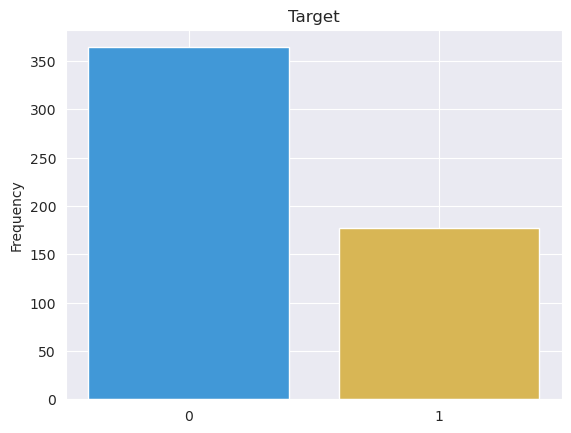

Target: 
Target
0    364
1    177
Name: count, dtype: int64




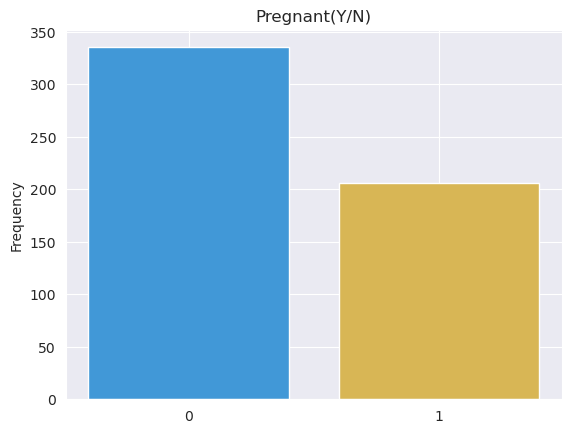

Pregnant(Y/N): 
Pregnant(Y/N)
0    335
1    206
Name: count, dtype: int64




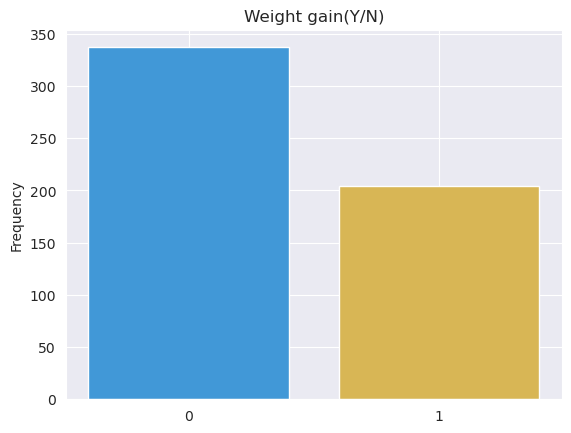

Weight gain(Y/N): 
Weight gain(Y/N)
0    337
1    204
Name: count, dtype: int64




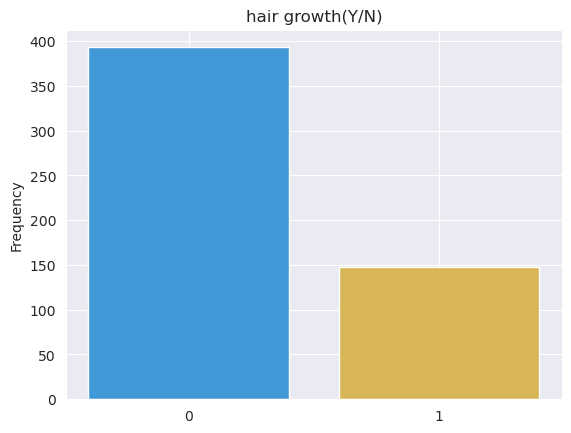

hair growth(Y/N): 
hair growth(Y/N)
0    393
1    148
Name: count, dtype: int64




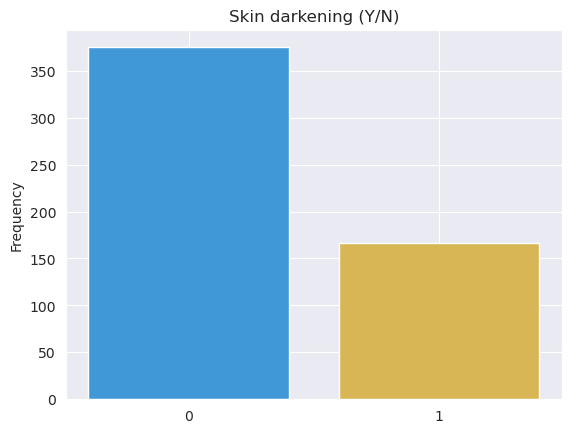

Skin darkening (Y/N): 
Skin darkening (Y/N)
0    375
1    166
Name: count, dtype: int64




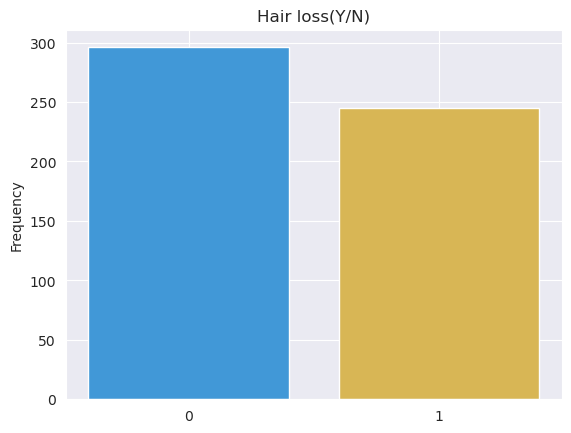

Hair loss(Y/N): 
Hair loss(Y/N)
0    296
1    245
Name: count, dtype: int64




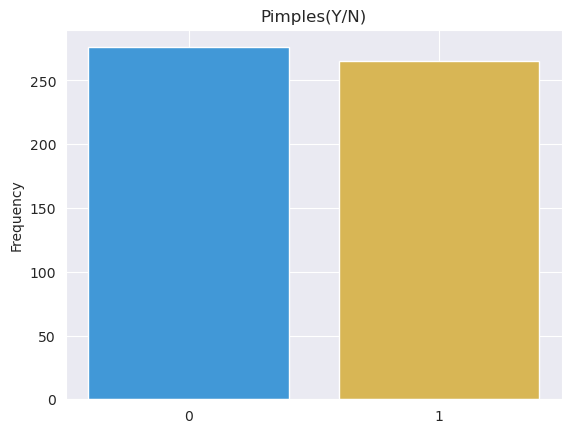

Pimples(Y/N): 
Pimples(Y/N)
0    276
1    265
Name: count, dtype: int64




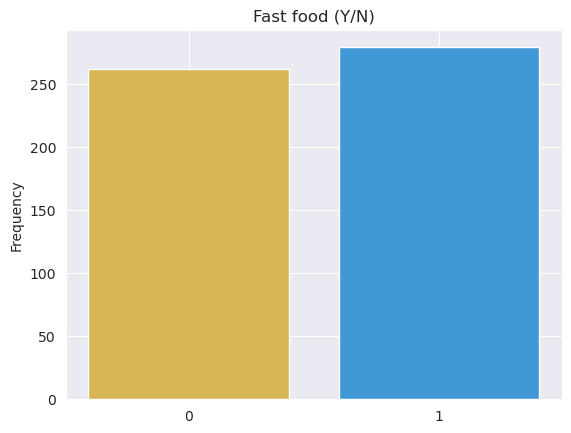

Fast food (Y/N): 
Fast food (Y/N)
1.0    279
0.0    262
Name: count, dtype: int64




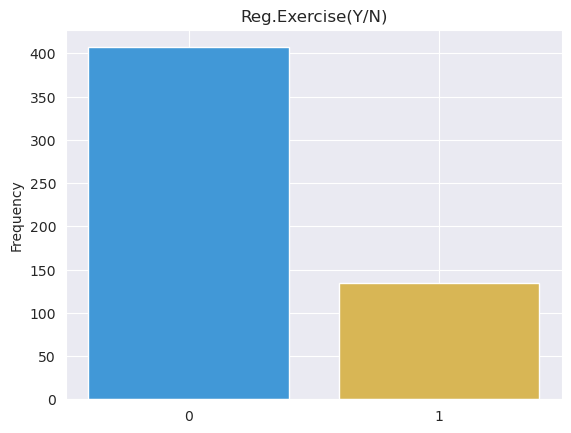

Reg.Exercise(Y/N): 
Reg.Exercise(Y/N)
0    407
1    134
Name: count, dtype: int64




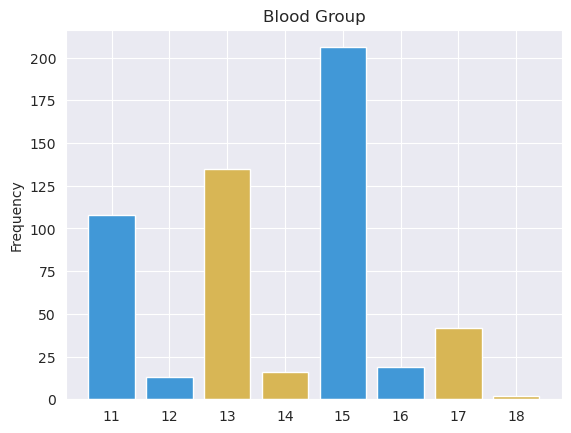

Blood Group: 
Blood Group
15    206
13    135
11    108
17     42
16     19
14     16
12     13
18      2
Name: count, dtype: int64




In [43]:
category = ["Target", "Pregnant(Y/N)", "Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)", "Fast food (Y/N)", "Reg.Exercise(Y/N)", "Blood Group"]
for c in category:
    bar_plot(c)

In [44]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable], bins = 50,color=colors[0])
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("Distribution of {}".format(variable))
    plt.show()
    print("\n\n")

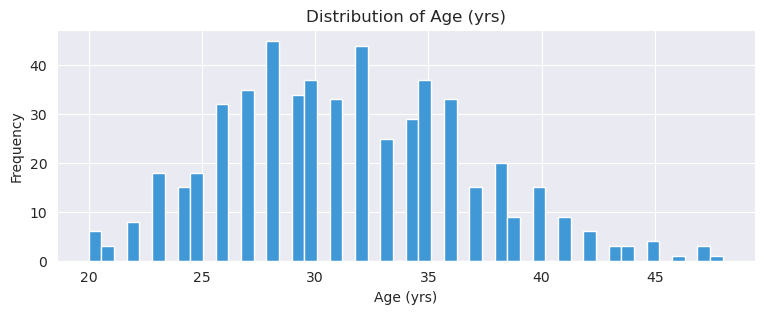

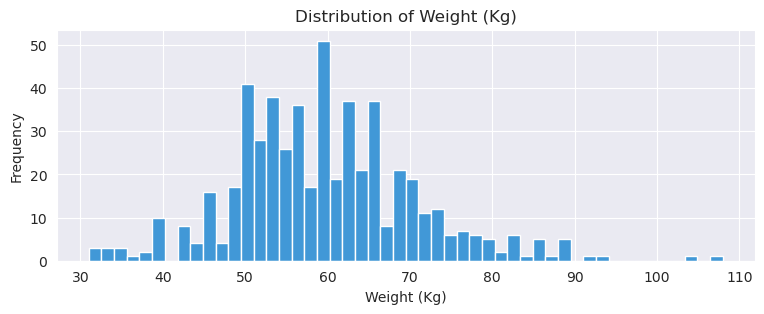

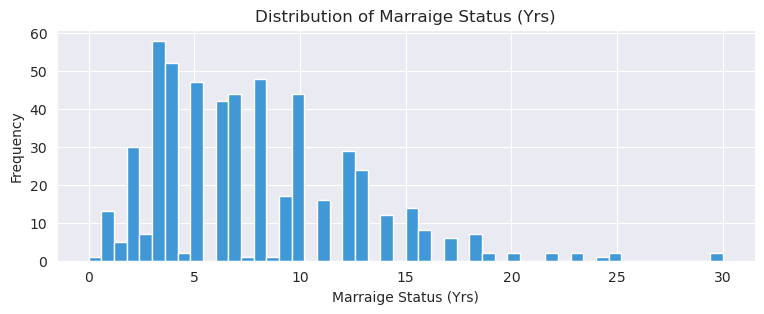

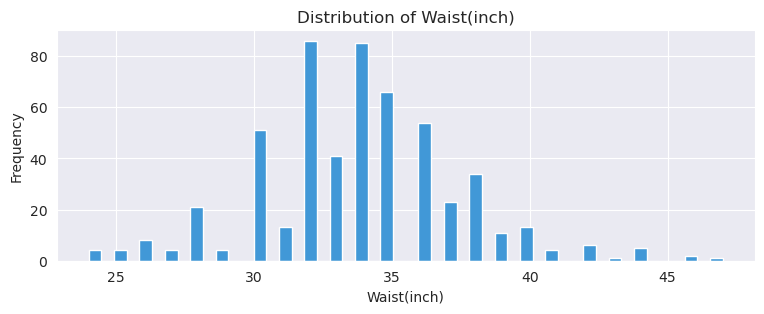

In [45]:
numericVar = ["Age (yrs)", "Weight (Kg)","Marraige Status (Yrs)", "Waist(inch)"]
for n in numericVar:
    plot_hist(n)

In [46]:
# Exploratory Data Analysis
data.describe()

,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,11.160037,2.560074,...,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,0.866904,0.901950,...,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


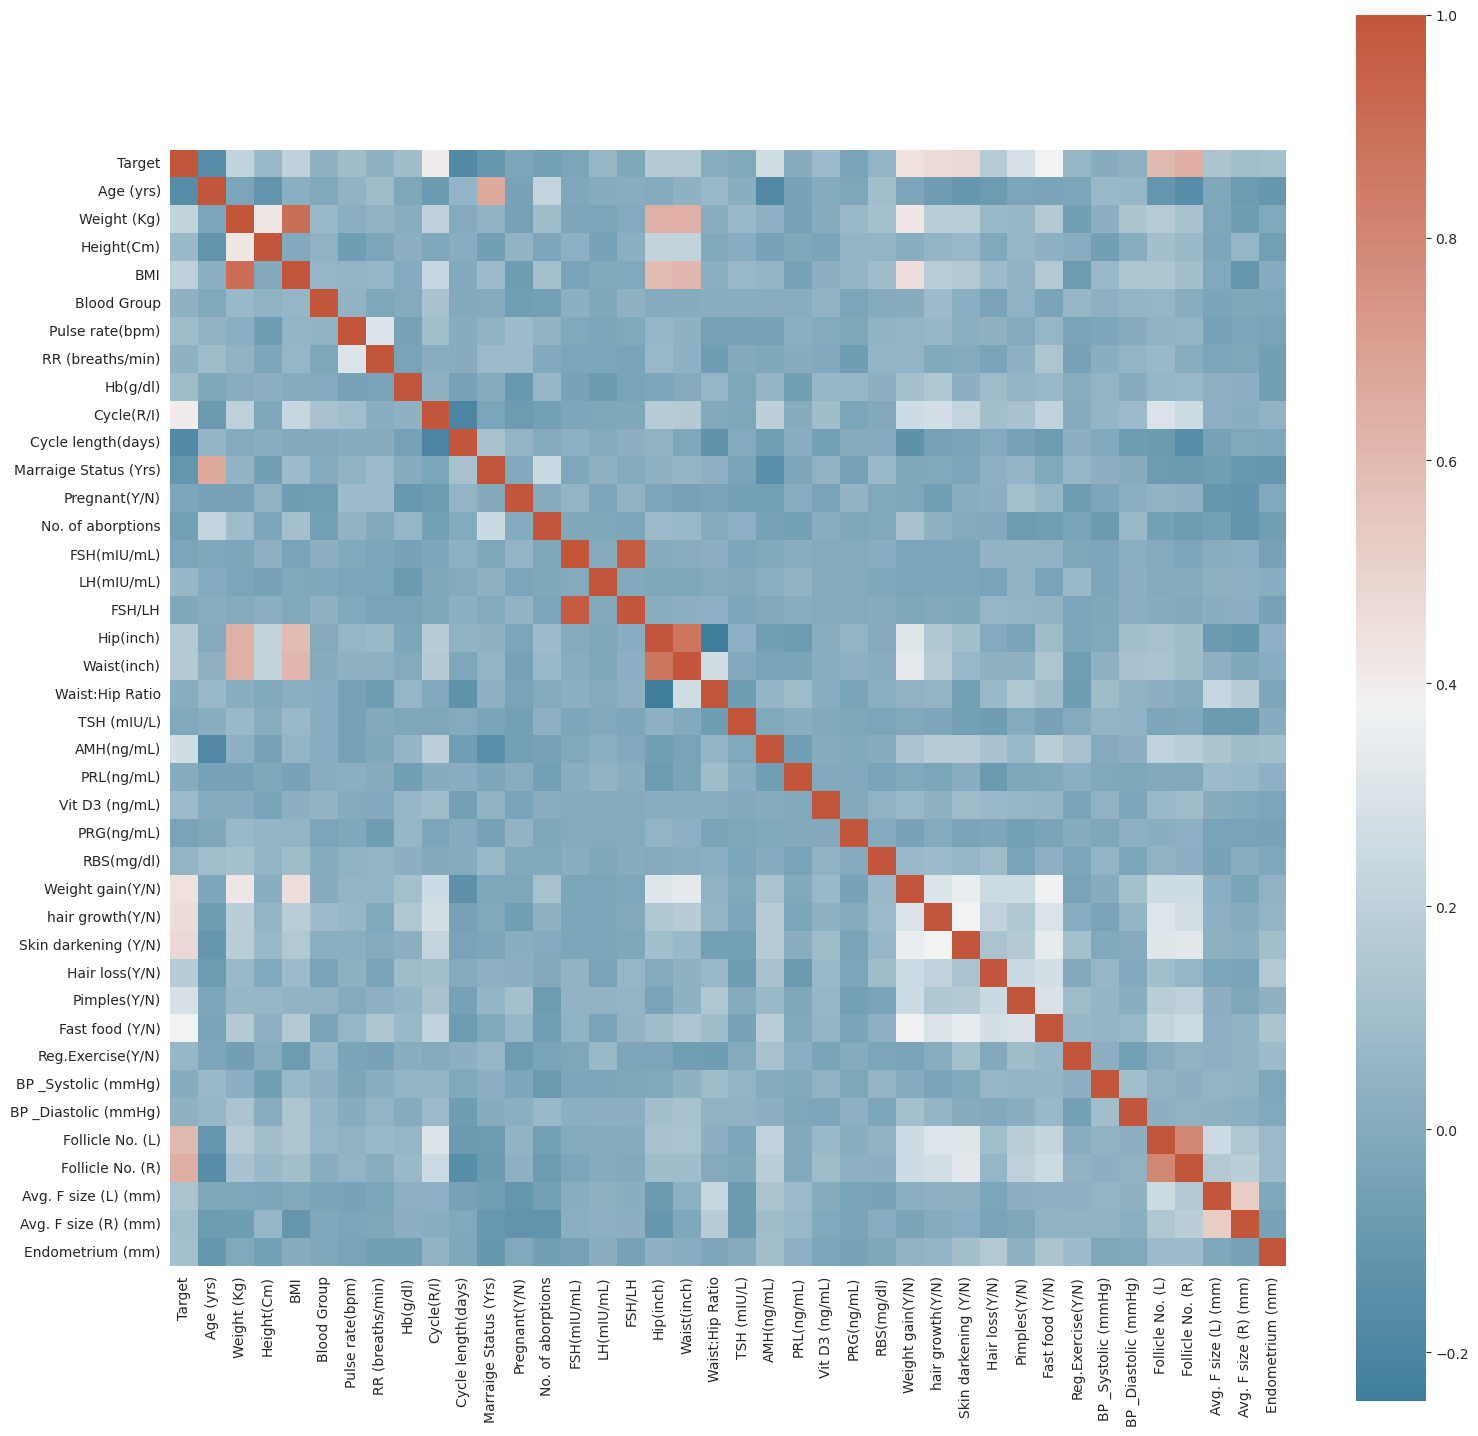

In [47]:
# Correlation Matrix
corrmat = data.corr()
plt.subplots(figsize=(18,18))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corrmat,cmap = cmap, square=True);

In [48]:
corrmat['Target'].sort_values(ascending=False)

Target                   1.000000
Follicle No. (R)         0.648327
Follicle No. (L)         0.603346
Skin darkening (Y/N)     0.475733
hair growth(Y/N)         0.464667
Weight gain(Y/N)         0.441047
Cycle(R/I)               0.401644
Fast food (Y/N)          0.376183
Pimples(Y/N)             0.286077
AMH(ng/mL)               0.264141
Weight (Kg)              0.211938
BMI                      0.199534
Hair loss(Y/N)           0.172879
Waist(inch)              0.164598
Hip(inch)                0.162297
Avg. F size (L) (mm)     0.132992
Endometrium (mm)         0.106648
Avg. F size (R) (mm)     0.097690
Pulse rate(bpm)          0.091821
Hb(g/dl)                 0.087170
Vit D3 (ng/mL)           0.085494
Height(Cm)               0.068254
Reg.Exercise(Y/N)        0.065337
LH(mIU/mL)               0.063879
RBS(mg/dl)               0.048922
BP _Diastolic (mmHg)     0.038032
RR (breaths/min)         0.036928
Blood Group              0.036433
Waist:Hip Ratio          0.012386
BP _Systolic (

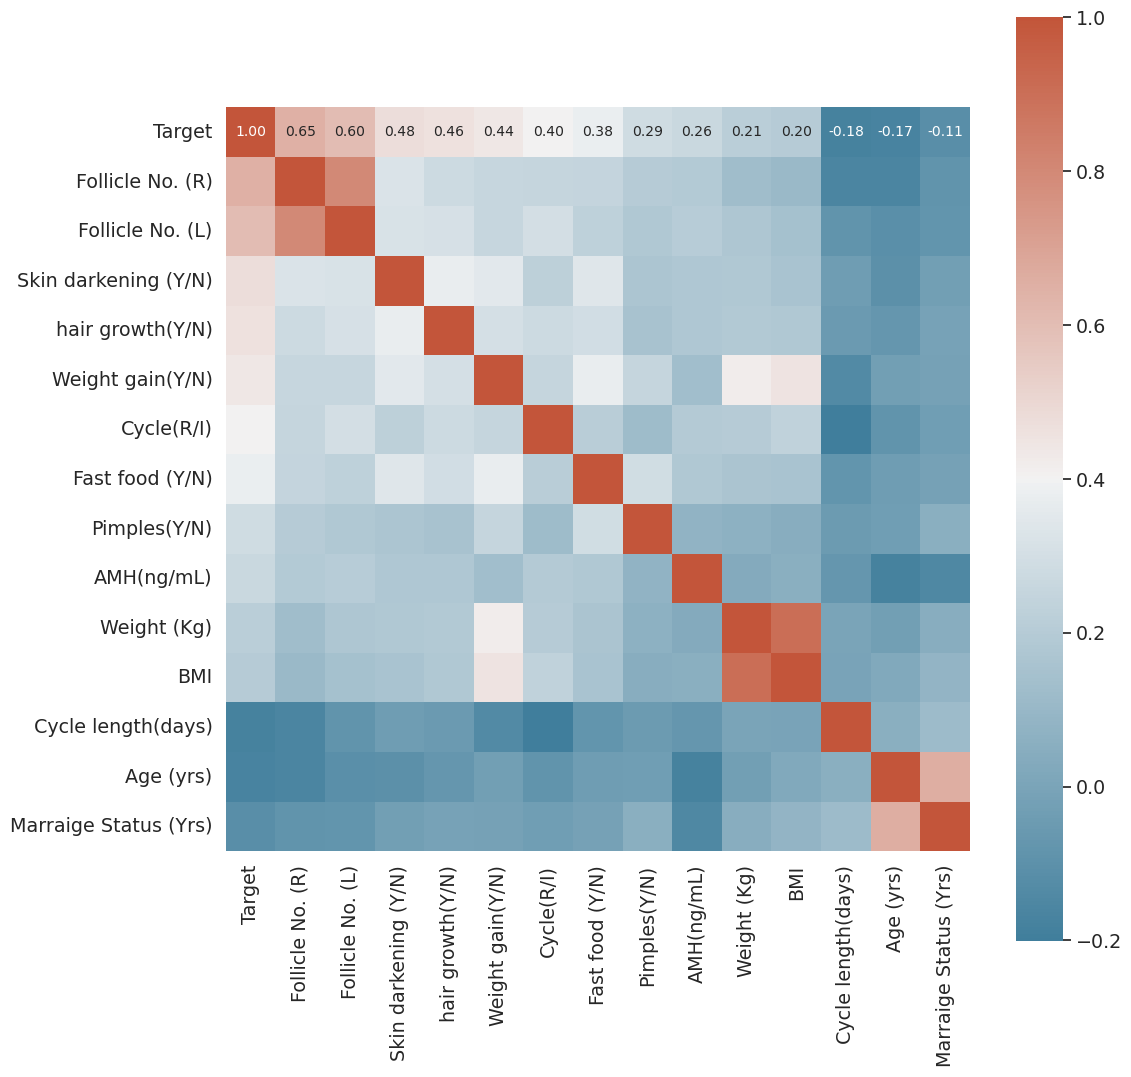

In [49]:
plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k,'Target')['Target'].index
cols_n = corrmat.nsmallest(l, 'Target')['Target'].index
cols = cols_p.append(cols_n)

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
hm = sns.heatmap(cm, cbar=True,cmap=cmap, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [50]:
cols

Index(['Target', 'Follicle No. (R)', 'Follicle No. (L)',
       'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)',
       'Cycle(R/I)', 'Fast food (Y/N)', 'Pimples(Y/N)', 'AMH(ng/mL)',
       'Weight (Kg)', 'BMI', 'Cycle length(days)', 'Age (yrs)',
       'Marraige Status (Yrs)'],
      dtype='object')

In [51]:
#Positive Correlation between Target and Follicle number, Skin darkening, Hair growth and weight gain.

In [54]:
# CHI SQUARE TEST OF INDEPENDENCE
#H0 : Variables are independent of each other

import scipy.stats as stats
alpha = 0.05

p_val = []

def chisq(c):
  cont_tbl = pd.crosstab(data[c],data['Target'])
  stat, p, dof, expected = stats.chi2_contingency(cont_tbl)
  print('P-value : ' + str(p))
  p_val.append(p)
  if p <= alpha:
    print('Reject Null Hypothesis. Target and ' + c + ' are associated with each other\n')
  else:
    print('Fail to reject Null Hypothesis. Target and ' + c + ' are not associated with each other\n')

In [55]:
df_cat = ['Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)','Fast food (Y/N)', 'Pimples(Y/N)']
for c in df_cat:
  chisq(c)

P-value : 5.573087703802324e-28
Reject Null Hypothesis. Target and Skin darkening (Y/N) are associated with each other

P-value : 9.633522761918661e-27
Reject Null Hypothesis. Target and hair growth(Y/N) are associated with each other

P-value : 2.8716592631832225e-24
Reject Null Hypothesis. Target and Weight gain(Y/N) are associated with each other

P-value : 4.796615760588168e-18
Reject Null Hypothesis. Target and Fast food (Y/N) are associated with each other

P-value : 5.2977026100864164e-11
Reject Null Hypothesis. Target and Pimples(Y/N) are associated with each other



In [56]:
# p_val = [round(x,10) for x in p_val]
tbp = pd.DataFrame({'Variables' : df_cat,'P Values' : p_val})
tbp

,Variables,P Values
0,Skin darkening (Y/N),5.573088e-28
1,hair growth(Y/N),9.633523e-27
2,Weight gain(Y/N),2.871659e-24
3,Fast food (Y/N),4.796616e-18
4,Pimples(Y/N),5.297703e-11


In [57]:
#INDEPENDENT SAMPLES T-TEST
Yes = data[data['Target'] == 1]
No = data[data['Target'] == 0]
p_val = []
def ttest(c):
  t, p = stats.ttest_ind(Yes[c],No[c])
  print('P-value : ' + str(p))
  p_val.append(p)

  if p <= alpha:
    print('Reject Null Hypothesis that  2 independent samples have identical average (expected) values.\nThus, ' + c + ' has an effect on Target.\n')
  else:
    print('Fail to reject Null Hypothesis that 2 independent samples have identical average (expected) values.\nThus, '+ c + ' has an no effect on Target.\n')


In [58]:
df_nums = cols.drop(df_cat)
df_nums = df_nums.drop(['Target'])
df_nums

for n in df_nums:
  ttest(n)

# ttest('PRL(ng/mL)')
# OUTPUT FOR THIS -
#P-value : 0.9049990466253925
#Fail to reject Null Hypothesis that 2 independent samples have identical average (expected) values.
#Thus, PRL(ng/mL) has an no effect on Target.

P-value : 7.956425231675759e-66
Reject Null Hypothesis that  2 independent samples have identical average (expected) values.
Thus, Follicle No. (R) has an effect on Target.

P-value : 6.036529826024768e-55
Reject Null Hypothesis that  2 independent samples have identical average (expected) values.
Thus, Follicle No. (L) has an effect on Target.

P-value : 2.1754276134108946e-22
Reject Null Hypothesis that  2 independent samples have identical average (expected) values.
Thus, Cycle(R/I) has an effect on Target.

P-value : 4.355535073050478e-10
Reject Null Hypothesis that  2 independent samples have identical average (expected) values.
Thus, AMH(ng/mL) has an effect on Target.

P-value : 6.532451436302058e-07
Reject Null Hypothesis that  2 independent samples have identical average (expected) values.
Thus, Weight (Kg) has an effect on Target.

P-value : 2.9048461323342644e-06
Reject Null Hypothesis that  2 independent samples have identical average (expected) values.
Thus, BMI has an eff

In [59]:
tbp = pd.DataFrame({'Variables' : df_nums,'P Values' : p_val})
tbp

,Variables,P Values
0,Follicle No. (R),7.956425e-66
1,Follicle No. (L),6.036530e-55
2,Cycle(R/I),2.175428e-22
3,AMH(ng/mL),4.355535e-10
4,Weight (Kg),6.532451e-07
5,BMI,2.904846e-06
6,Cycle length(days),2.975823e-05
7,Age (yrs),8.194488e-05
8,Marraige Status (Yrs),8.489122e-03


In [60]:
# Thus, all Numerical features selected affect the Target values.

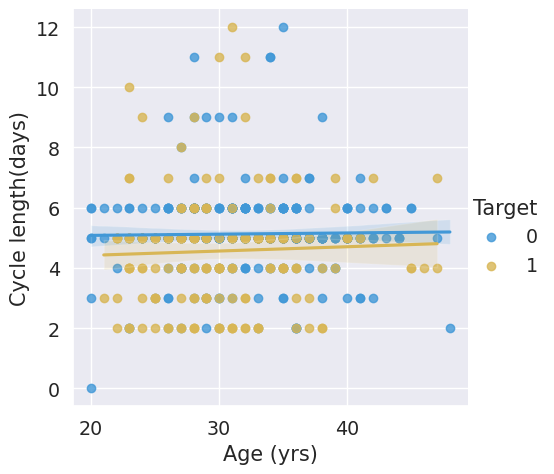

In [61]:
# PATTERNS OF VARIABLES

#Patterns of Length of Menstrual Cycle
grph = sns.lmplot(data=data,x="Age (yrs)",y="Cycle length(days)", hue="Target", palette=colors)
plt.show(grph)

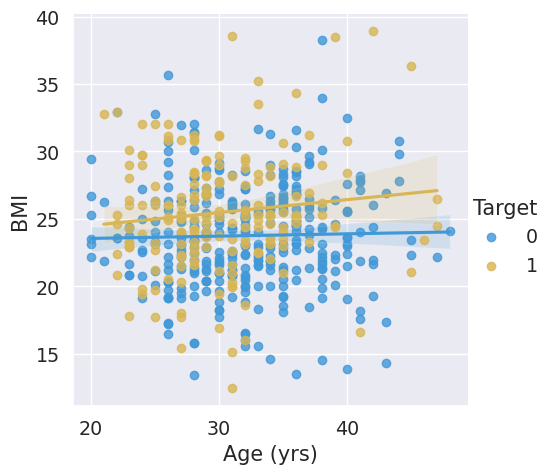

In [62]:
#Patterns of BMI
fig= sns.lmplot(data =data,x="Age (yrs)",y="BMI", hue="Target", palette= colors )
plt.show(fig)

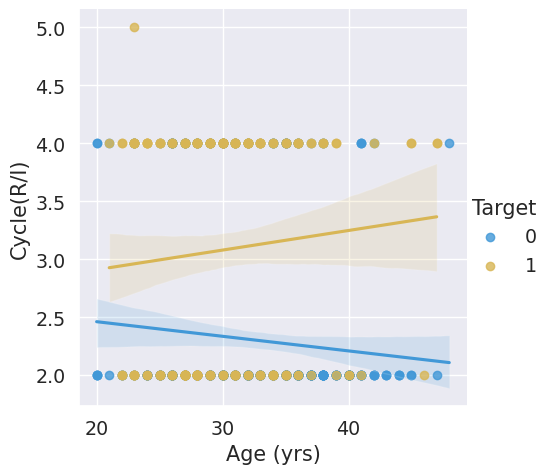

In [63]:
# Patterns of irregularity in menstruation
sns.lmplot(data =data,x="Age (yrs)",y="Cycle(R/I)", hue="Target",palette=colors)
plt.show()

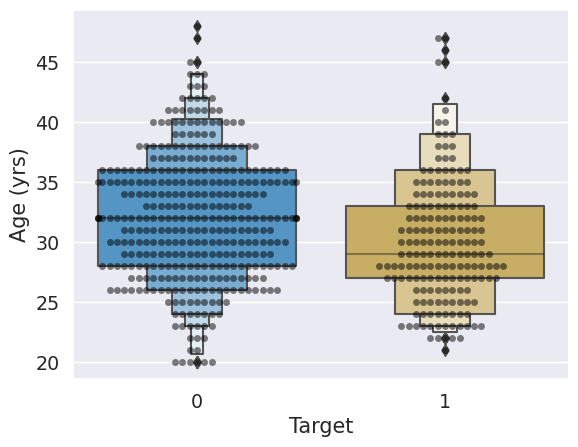

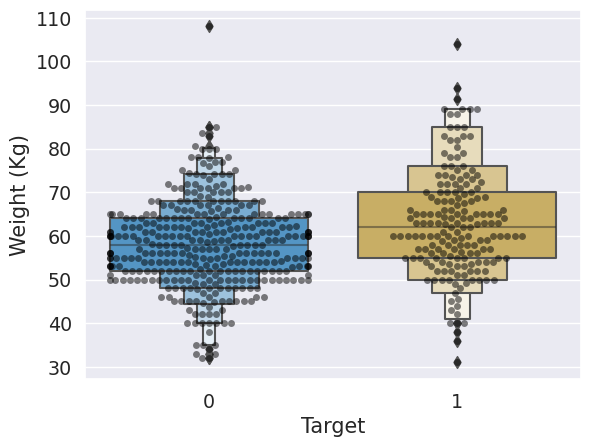

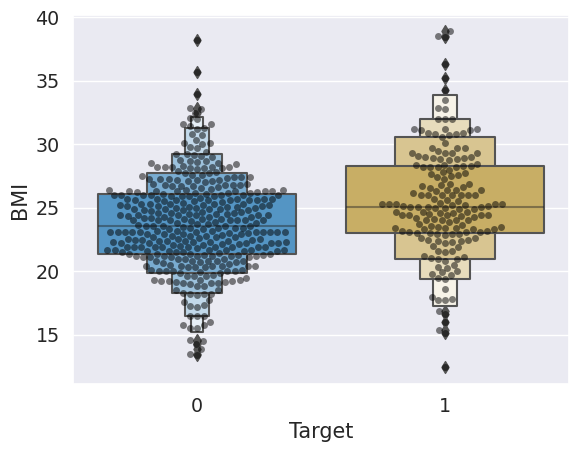

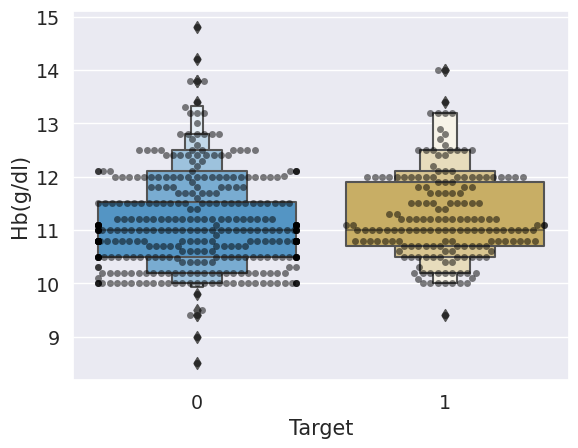

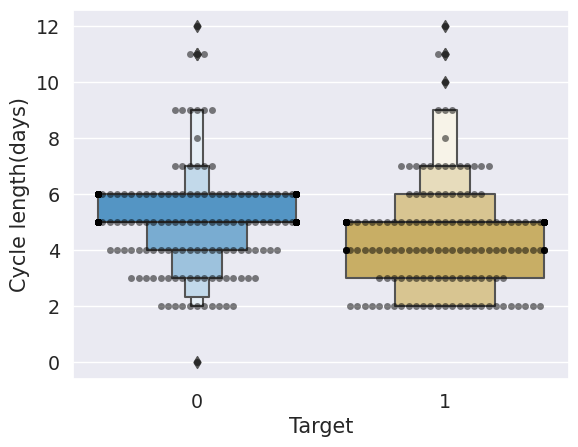

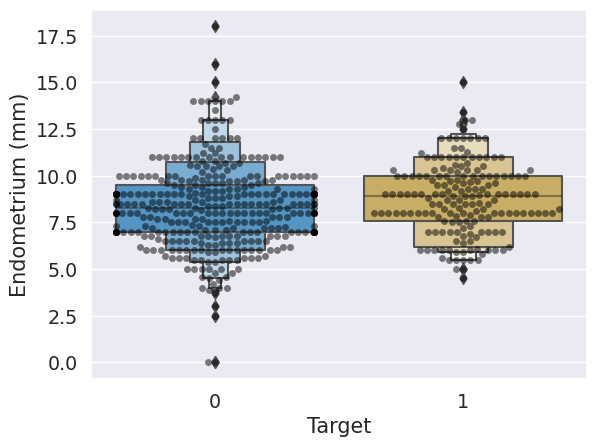

In [64]:
# Comparison of other features with target
features = ["Age (yrs)","Weight (Kg)", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]
for i in features:
    sns.swarmplot(x=data["Target"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["Target"], y=data[i], palette = colors)
    plt.show()

In [65]:
# DATA MODELLING
final_features = df_cat + list(df_nums)
x = data[final_features]
y = data.Target
x.columns

Index(['Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)',
       'Fast food (Y/N)', 'Pimples(Y/N)', 'Follicle No. (R)',
       'Follicle No. (L)', 'Cycle(R/I)', 'AMH(ng/mL)', 'Weight (Kg)', 'BMI',
       'Cycle length(days)', 'Age (yrs)', 'Marraige Status (Yrs)'],
      dtype='object')

In [67]:
#Splitting of data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =
0.3, random_state = 0)

In [68]:
print("x_train : ",len(x_train))
print("x_test : ",len(x_test))
print("y_train : ",len(y_train))
print("y_test : ",len(y_test))

x_train :  378
x_test :  163
y_train :  378
y_test :  163


In [69]:
#Transformation of data:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train =sc.fit_transform(x_train)
x_test=sc.transform(x_test)
# x_train
# x_test

In [70]:
# Model Building
# Untuned models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
accuracy_score11= 0.0
accuracy_score1 = 0.0

train_acc = []
test_acc = []

#All values for testing
sens = []
spec = []
prec = []
f1 = []

In [71]:
def output(model, x_train, x_test, y_train, y_test):

  y_pred1 = model.predict(x_train)
  y_pred2 = model.predict(x_test)

  print("Training accuracy : ",model.score(x_train,y_train))
  print("Testing accuracy : ",model.score(x_test,y_test))

  print("\nClassification Report - Training")
  print(classification_report(y_train,y_pred1))

  print("\nClassification Report - Testing")
  print(classification_report(y_test,y_pred2))

  cm11 = confusion_matrix(y_train,y_pred1)
  print("\nConfusion Matrix - Training")
  print(cm11)

  cm1 = confusion_matrix(y_test,y_pred2)
  print("\nConfusion Matrix - Testing")
  print(cm1)


  cm = confusion_matrix(y_test, y_pred2)
  tn, fp, fn, tp = cm.ravel()
  print(tp,fp,fn,tn)

  sensitivity = tp / (tp + fn)
  sens.append(sensitivity)

  specificity = tn / (tn + fp)
  spec.append(specificity)

  precision = tp/(tp + fn)
  prec.append(precision)

  f1score = f1_score(y_test, y_pred2)
  f1.append(f1score)

  accuracy_score11 = accuracy_score(y_train,y_pred1)
  print('\nAccuracy Score - Training')
  print(accuracy_score11)
  train_acc.append(accuracy_score11)

  accuracy_score1 = accuracy_score(y_test,y_pred2)
  print('\nAccuracy Score - Testing')
  print(accuracy_score1)
  test_acc.append(accuracy_score1)


In [72]:
#XGBOOST
from xgboost import XGBClassifier
model1 = XGBClassifier()
model1.fit(x_train, y_train)

y_pred1 = model1.predict(x_test)

output(model1, x_train, x_test, y_train, y_test)

Training accuracy :  1.0
Testing accuracy :  0.8588957055214724

Classification Report - Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00       123

    accuracy                           1.00       378
   macro avg       1.00      1.00      1.00       378
weighted avg       1.00      1.00      1.00       378


Classification Report - Testing
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       109
           1       0.82      0.74      0.78        54

    accuracy                           0.86       163
   macro avg       0.85      0.83      0.84       163
weighted avg       0.86      0.86      0.86       163


Confusion Matrix - Training
[[255   0]
 [  0 123]]

Confusion Matrix - Testing
[[100   9]
 [ 14  40]]
40 9 14 100

Accuracy Score - Training
1.0

Accuracy Score - Testing
0.8588957055214724


In [73]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(x_train, y_train)

y_pred2 = model2.predict(x_test)

output(model2, x_train, x_test, y_train, y_test)


Training accuracy :  0.91005291005291
Testing accuracy :  0.9079754601226994

Classification Report - Training
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.89      0.83      0.86       123

    accuracy                           0.91       378
   macro avg       0.90      0.89      0.90       378
weighted avg       0.91      0.91      0.91       378


Classification Report - Testing
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       109
           1       0.90      0.81      0.85        54

    accuracy                           0.91       163
   macro avg       0.91      0.88      0.89       163
weighted avg       0.91      0.91      0.91       163


Confusion Matrix - Training
[[242  13]
 [ 21 102]]

Confusion Matrix - Testing
[[104   5]
 [ 10  44]]
44 5 10 104

Accuracy Score - Training
0.91005291005291

Accuracy Score - Testing
0.907975460122699

In [74]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier()
model3.fit(x_train,y_train)

y_pred3 = model3.predict(x_test)

output(model3, x_train, x_test, y_train, y_test)

Training accuracy :  0.9074074074074074
Testing accuracy :  0.852760736196319

Classification Report - Training
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       255
           1       0.91      0.80      0.85       123

    accuracy                           0.91       378
   macro avg       0.91      0.88      0.89       378
weighted avg       0.91      0.91      0.91       378


Classification Report - Testing
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       109
           1       0.80      0.74      0.77        54

    accuracy                           0.85       163
   macro avg       0.84      0.82      0.83       163
weighted avg       0.85      0.85      0.85       163


Confusion Matrix - Training
[[245  10]
 [ 25  98]]

Confusion Matrix - Testing
[[99 10]
 [14 40]]
40 10 14 99

Accuracy Score - Training
0.9074074074074074

Accuracy Score - Testing
0.852760736196319


In [75]:
#SVM
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

model4 = SVC()
model4.fit(x_train,y_train)

y_pred4 = model4.predict(x_test)

output(model4, x_train, x_test, y_train, y_test)


Training accuracy :  0.9497354497354498
Testing accuracy :  0.8895705521472392

Classification Report - Training
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       255
           1       0.95      0.89      0.92       123

    accuracy                           0.95       378
   macro avg       0.95      0.94      0.94       378
weighted avg       0.95      0.95      0.95       378


Classification Report - Testing
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       109
           1       0.88      0.78      0.82        54

    accuracy                           0.89       163
   macro avg       0.89      0.86      0.87       163
weighted avg       0.89      0.89      0.89       163


Confusion Matrix - Training
[[249   6]
 [ 13 110]]

Confusion Matrix - Testing
[[103   6]
 [ 12  42]]
42 6 12 103

Accuracy Score - Training
0.9497354497354498

Accuracy Score - Testing
0.88957055214

In [76]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier()
model5.fit(x_train,y_train)

y_pred5 = model5.predict(x_test)

output(model5, x_train, x_test, y_train, y_test)

Training accuracy :  1.0
Testing accuracy :  0.7914110429447853

Classification Report - Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00       123

    accuracy                           1.00       378
   macro avg       1.00      1.00      1.00       378
weighted avg       1.00      1.00      1.00       378


Classification Report - Testing
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       109
           1       0.70      0.65      0.67        54

    accuracy                           0.79       163
   macro avg       0.77      0.76      0.76       163
weighted avg       0.79      0.79      0.79       163


Confusion Matrix - Training
[[255   0]
 [  0 123]]

Confusion Matrix - Testing
[[94 15]
 [19 35]]
35 15 19 94

Accuracy Score - Training
1.0

Accuracy Score - Testing
0.7914110429447853


In [77]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier()
model6.fit(x_train,y_train)

y_pred6 = model6.predict(x_test)

output(model6, x_train, x_test, y_train, y_test)

Training accuracy :  1.0
Testing accuracy :  0.9079754601226994

Classification Report - Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00       123

    accuracy                           1.00       378
   macro avg       1.00      1.00      1.00       378
weighted avg       1.00      1.00      1.00       378


Classification Report - Testing
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       109
           1       0.90      0.81      0.85        54

    accuracy                           0.91       163
   macro avg       0.91      0.88      0.89       163
weighted avg       0.91      0.91      0.91       163


Confusion Matrix - Training
[[255   0]
 [  0 123]]

Confusion Matrix - Testing
[[104   5]
 [ 10  44]]
44 5 10 104

Accuracy Score - Training
1.0

Accuracy Score - Testing
0.9079754601226994


In [78]:
#Catboost
model7 = CatBoostClassifier()
model7.fit(x_train, y_train, verbose = False)

y_pred7 = model7.predict(x_test)

output(model7, x_train, x_test, y_train, y_test)

Training accuracy :  0.9947089947089947
Testing accuracy :  0.8957055214723927

Classification Report - Training
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       255
           1       1.00      0.98      0.99       123

    accuracy                           0.99       378
   macro avg       1.00      0.99      0.99       378
weighted avg       0.99      0.99      0.99       378


Classification Report - Testing
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       109
           1       0.88      0.80      0.83        54

    accuracy                           0.90       163
   macro avg       0.89      0.87      0.88       163
weighted avg       0.89      0.90      0.89       163


Confusion Matrix - Training
[[255   0]
 [  2 121]]

Confusion Matrix - Testing
[[103   6]
 [ 11  43]]
43 6 11 103

Accuracy Score - Training
0.9947089947089947

Accuracy Score - Testing
0.89570552147

In [79]:
model_list = ['XGBRF', 'Logistic Regression', 'KNearestNeighbours', 'SVM', 'Decision Tree','RandomForest','CatBoostClassifier']
final_train_acc = train_acc
final_test_acc = test_acc
sens1 = sens

In [80]:
#ROC Curves
from sklearn.metrics import roc_curve,auc

xgboost_fpr, xgboost_tpr, threshold = roc_curve(y_test,y_pred1)
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test,y_pred2)
knn_fpr, knn_tpr, threshold = roc_curve(y_test,y_pred3)
svm_fpr, svm_tpr, threshold = roc_curve(y_test,y_pred4)
decisiontree_fpr, decisiontree_tpr, threshold = roc_curve(y_test,y_pred5)
randomforest_fpr, randomforest_tpr, threshold = roc_curve(y_test,y_pred6)
catboost_fpr, catboost_tpr, threshold = roc_curve(y_test, y_pred7)


In [81]:
#AUC values
auc_xgboost = auc(xgboost_fpr,xgboost_tpr)
auc_logistic = auc(logistic_fpr,logistic_tpr)
auc_knn = auc(knn_fpr,knn_tpr)
auc_svm = auc(svm_fpr,svm_tpr)
auc_decisiontree = auc(decisiontree_fpr,decisiontree_tpr)
auc_randomforest = auc(randomforest_fpr,randomforest_tpr)
auc_catboost = auc(catboost_fpr, catboost_tpr)

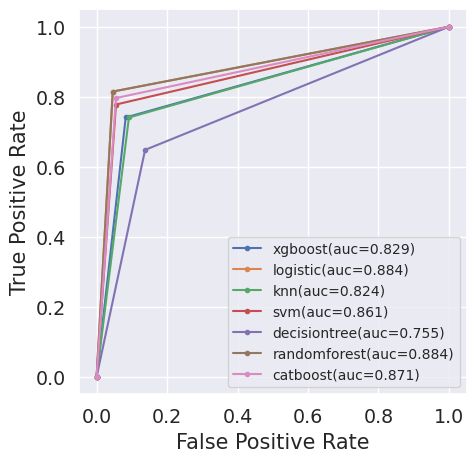

In [82]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(xgboost_fpr, xgboost_tpr, marker='.',label='xgboost(auc=%0.3f)'%auc_xgboost)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='logistic(auc=%0.3f)'%auc_logistic)
plt.plot(knn_fpr, knn_tpr, marker='.', label='knn(auc=%0.3f)'%auc_knn)
plt.plot(svm_fpr, svm_tpr, marker='.', label='svm(auc=%0.3f)'%auc_svm)
plt.plot(decisiontree_fpr, decisiontree_tpr, marker='.', label='decisiontree(auc=%0.3f)'%auc_decisiontree)
plt.plot(randomforest_fpr, randomforest_tpr, marker='.', label='randomforest(auc=%0.3f)'%auc_randomforest)
plt.plot(catboost_fpr, catboost_tpr, marker = '.', label = 'catboost(auc=%0.3f)'%auc_catboost)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize = 10)
plt.show()

In [84]:
# Hyperparameter Training
random_state = 0
classifier = [XGBClassifier(random_state = random_state),
              LogisticRegression(random_state = random_state),
              KNeighborsClassifier(),
              SVC(random_state = random_state),
              DecisionTreeClassifier(random_state = random_state),
              RandomForestClassifier(random_state = random_state),
              CatBoostClassifier(random_state = random_state)]

# Decision Tree
dtg = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

# SVM
svmg = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

# Random Forest
rfg = {"max_features": ['auto', 'sqrt', 'log2'],
                "n_estimators":[300,500],
                "criterion":["gini"],
                'max_depth' : [4,5,6,7,8,9,10,12],}

# Logistic Regression
lrg = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

# KNN
knng = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

#Catboost
catg =  {'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}

#XGBRF
xgbrfg = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

classifier_param = [xgbrfg, lrg, knng, svmg, dtg, rfg, catg]

In [85]:
model_list

['XGBRF',
 'Logistic Regression',
 'KNearestNeighbours',
 'SVM',
 'Decision Tree',
 'RandomForest',
 'CatBoostClassifier']

In [90]:
# MODELS COMPARISON AFTER TUNING
hpt_test = test_acc
hpt_train = train_acc

In [92]:
#ROC Curves
from sklearn.metrics import roc_curve,auc

xgboost_fpr, xgboost_tpr, threshold = roc_curve(y_test,y_pred1)
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test,y_pred2)
knn_fpr, knn_tpr, threshold = roc_curve(y_test,y_pred3)
svm_fpr, svm_tpr, threshold = roc_curve(y_test,y_pred4)
decisiontree_fpr, decisiontree_tpr, threshold = roc_curve(y_test,y_pred5)
randomforest_fpr, randomforest_tpr, threshold = roc_curve(y_test,y_pred6)
catboost_fpr, catboost_tpr, threshold = roc_curve(y_test, y_pred7)

In [93]:
#AUC values
auc_xgboost = auc(xgboost_fpr,xgboost_tpr)
auc_logistic = auc(logistic_fpr,logistic_tpr)
auc_knn = auc(knn_fpr,knn_tpr)
auc_svm = auc(svm_fpr,svm_tpr)
auc_decisiontree = auc(decisiontree_fpr,decisiontree_tpr)
auc_randomforest = auc(randomforest_fpr,randomforest_tpr)
auc_catboost = auc(catboost_fpr, catboost_tpr)
auc = [auc_xgboost, auc_logistic, auc_knn, auc_svm, auc_decisiontree, auc_randomforest, auc_catboost]
auc = [round(x,2) for x in auc]

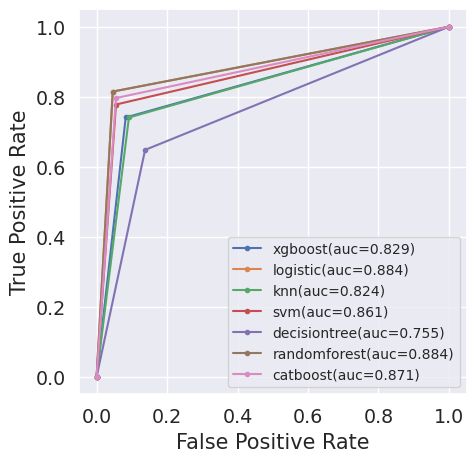

In [94]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(xgboost_fpr, xgboost_tpr, marker='.',label='xgboost(auc=%0.3f)'%auc_xgboost)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='logistic(auc=%0.3f)'%auc_logistic)
plt.plot(knn_fpr, knn_tpr, marker='.', label='knn(auc=%0.3f)'%auc_knn)
plt.plot(svm_fpr, svm_tpr, marker='.', label='svm(auc=%0.3f)'%auc_svm)
plt.plot(decisiontree_fpr, decisiontree_tpr, marker='.', label='decisiontree(auc=%0.3f)'%auc_decisiontree)
plt.plot(randomforest_fpr, randomforest_tpr, marker='.', label='randomforest(auc=%0.3f)'%auc_randomforest)
plt.plot(catboost_fpr, catboost_tpr, marker = '.', label = 'catboost(auc=%0.3f)'%auc_catboost)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize = 10)
plt.show()

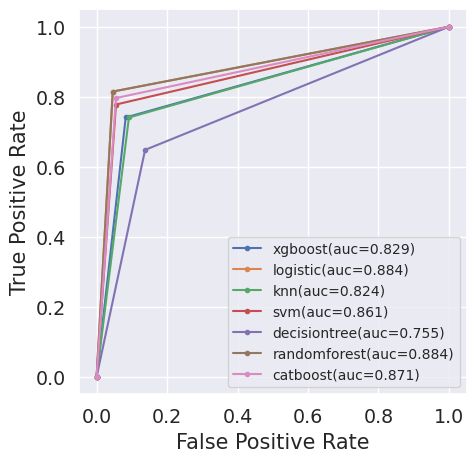

In [95]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(xgboost_fpr, xgboost_tpr, marker='.',label='xgboost(auc=%0.3f)'%auc_xgboost)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='logistic(auc=%0.3f)'%auc_logistic)
plt.plot(knn_fpr, knn_tpr, marker='.', label='knn(auc=%0.3f)'%auc_knn)
plt.plot(svm_fpr, svm_tpr, marker='.', label='svm(auc=%0.3f)'%auc_svm)
plt.plot(decisiontree_fpr, decisiontree_tpr, marker='.', label='decisiontree(auc=%0.3f)'%auc_decisiontree)
plt.plot(randomforest_fpr, randomforest_tpr, marker='.', label='randomforest(auc=%0.3f)'%auc_randomforest)
plt.plot(catboost_fpr, catboost_tpr, marker = '.', label = 'catboost(auc=%0.3f)'%auc_catboost)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize = 10)
plt.show(#

In [98]:
#According to metrics above, Logistic is the best performing model.


NameError: name 'metr_df' is not defined